In [2]:
# All tickets for Sponsor 31
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=closed&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&sponsor=%5ESponsor31-can&or&sponsor=%5ESponsor31-must&col=id&col=summary&col=sponsor&col=status&col=owner&col=type&col=priority&col=milestone&col=component&col=version&col=resolution&col=changetime&col=actualpoints&col=points&col=keywords&order=priority

# I NEED TO FILTER BY network-roadmap keyword but still not doing it because not all tickets in the roadmap are tagged

csv_path='/Users/gaba/Code/torproject/trac/datasets/S31_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

In [5]:
open_tickets = csv_file.query('Status!="closed"')
close_tickets = csv_file.query('Status=="closed"')

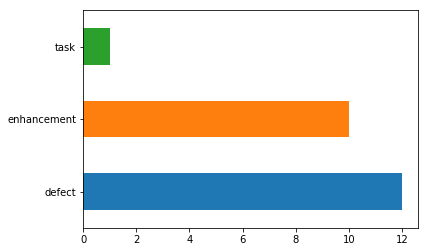

In [16]:
################################## FOR CLOSED TICKETS ##################################

# which type of tickets were closed
close_tickets['Type'].value_counts().plot.barh()

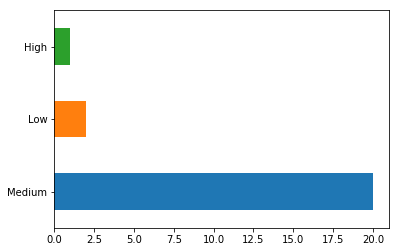

In [15]:
close_tickets['Priority'].value_counts().plot.barh()

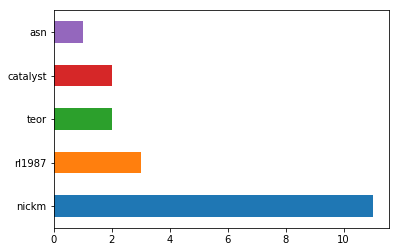

In [17]:
# who completed them
close_tickets['Owner'].value_counts().plot.barh()


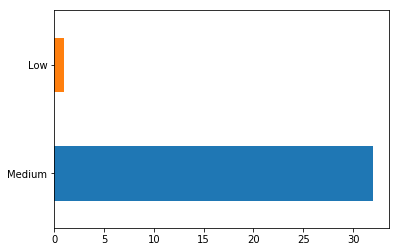

In [6]:
################################## FOR OPEN TICKETS ##################################
# how is the priority on open tickets
open_tickets['Priority'].value_counts().plot.barh()

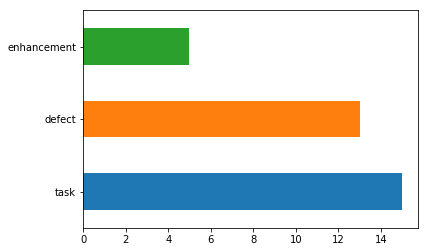

In [7]:
# which type of tickets
open_tickets['Type'].value_counts().plot.barh()

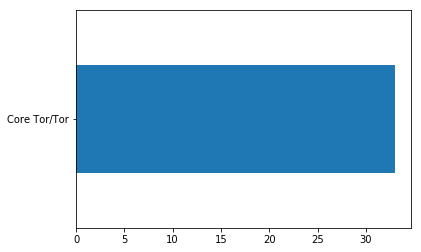

In [8]:

# which components we are changing
open_tickets['Component'].value_counts().plot.barh()

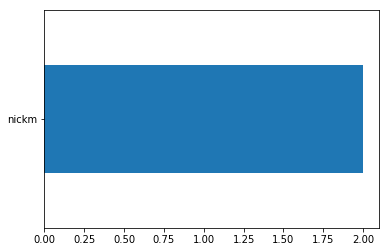

In [9]:
# who is assigned
open_tickets['Owner'].value_counts().plot.barh()


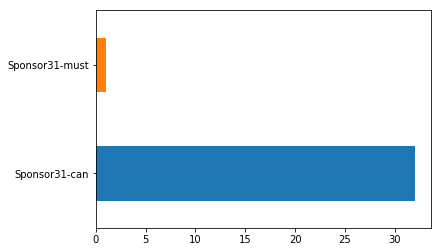

In [10]:
# how many must tickets versus 'can be done'
open_tickets['Sponsor'].value_counts().plot.barh()

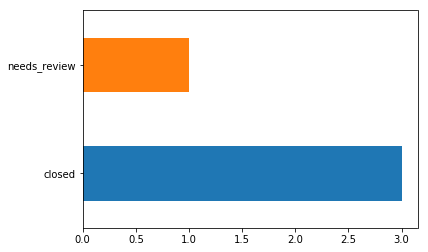

In [11]:
# how many sponsor31-must tickets are already done and how many still need to be finish
csv_file.query('Sponsor=="Sponsor31-must"')['Status'].value_counts().plot.barh()


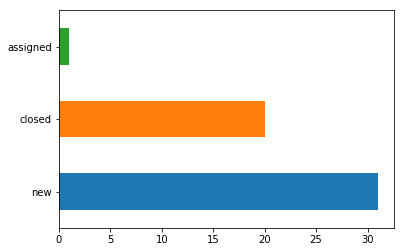

In [12]:
# what about the 'could be done' tickets
csv_file.query('Sponsor=="Sponsor31-can"')['Status'].value_counts().plot.barh()

In [13]:
# are all of the open tickets estimated?
csv_file[csv_file.Points.isnull()].query('Status!="closed"')

,id,Summary,Sponsor,Points,Status,Owner,Type,Priority,Milestone,Component,Version,Resolution,Modified,Actual Points,Keywords
1,25493,Improve patterns for cleaning up static variab...,Sponsor31-can,NaN,new,NaN,enhancement,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,15 ene. 2019 18:36:07,NaN,"034-triage-20180328, 034-roadmap-subtask, 034-..."
24,29656,describe global initialization in our tinytest...,Sponsor31-can,NaN,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,4 mar. 2019 18:34:33,NaN,developer-doc
25,29746,Improve Tor best practices tracker,Sponsor31-can,NaN,new,NaN,defect,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,13 mar. 2019 17:21:56,NaN,"practracker, tech-debt, refactoring, easy"
33,29895,avoid storing ints in void* in mainloop event ...,Sponsor31-can,NaN,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,25 mar. 2019 20:38:55,NaN,"portability, technical-debt"
46,30292,Refactor periodic event system so each subsyst...,Sponsor31-can,NaN,assigned,nickm,enhancement,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,25 abr. 2019 19:02:45,NaN,NaN


In [20]:
# which ones are the big tickets?
open_tickets.query('Points>6')

,id,Summary,Sponsor,Points,Status,Owner,Type,Priority,Milestone,Component,Version,Resolution,Modified,Actual Points,Keywords
4,29209,Reduce visibility of more data type internals,Sponsor31-can,15.0,new,NaN,task,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,2 may. 2019 02:15:09,3.5,technical-debt refactoring
5,29210,Distribute control.c functionality across vari...,Sponsor31-can,10.0,new,NaN,task,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:17:01,NaN,NaN
6,29211,Distribute config.c functionality across more ...,Sponsor31-can,15.0,new,NaN,task,Medium,Tor: 0.4.1.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:02,NaN,NaN
7,29212,Create more modularity inside src/core,Sponsor31-can,15.0,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,15 may. 2019 23:38:48,NaN,NaN
8,29213,Minimize the boundary between src/core and src...,Sponsor31-can,15.0,new,NaN,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:56,NaN,NaN
17,29222,Fix biggest violations of coding best-practices,Sponsor31-can,10.0,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:56,NaN,NaN
20,29225,Improve efficiency and flexibility of threadpo...,Sponsor31-can,15.0,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:56,NaN,NaN
22,29227,"Audit Tor roles (relay, bridge, etc) and remov...",Sponsor31-can,15.0,new,NaN,defect,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:56,NaN,NaN
23,29228,Unify some or all of Tor's various message/eve...,Sponsor31-can,10.0,new,NaN,task,Medium,Tor: 0.4.2.x-final,Core Tor/Tor,NaN,NaN,9 abr. 2019 18:22:56,NaN,NaN


In [14]:
# how many points still need to be done
points_to_go = open_tickets.filter(['Points']).sum()

points_to_go/3 # thinking 3 days per week for 1 developer

# starting June: we have until december:  24 semanas  ---> We will need at least 2.5 developers to complete all open tickets in this sponsor

Points    53.733333
dtype: float64